In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

Lets first load the Data to see how is going There!


In [ ]:
Dataset = pd.read_csv("/content/drive/MyDrive/100 days programing Challange/1-Linear Regression/RedWineData/winequality-red.csv")
Dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The Task is Prediction of Wine Quaity Based on 12 Different Feature whivh is give in Datafram.
so...
Since we have:
*   Multiple dependent Variable
*   we want to know which on the independent variable have the most effect on Dependent variable.
*   The output(dependent) variable is Discrete so Its a Linear not logistic Regression!

Now we decide to model of Algorithm which can help us to find The Best Quality Wine(It is Chianti in my opinion as an italian Citizen :) ) , lets prepare our Data for that!

# Data Preparaion
First is good to check missing Values.
then we can decide to remove them or using another technique to replace them with best method.


In [ ]:
a = list(Dataset.columns)
print(a)
b = []
for i in a:
    b.append(Dataset[i].isnull().sum())
Null_df = pd.DataFrame({'Feature:':a , 'NullNumbers':b})
Null_df

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,Feature:,NullNumbers
0,fixed acidity,0
1,volatile acidity,0
2,citric acid,0
3,residual sugar,0
4,chlorides,0
5,free sulfur dioxide,0
6,total sulfur dioxide,0
7,density,0
8,pH,0
9,sulphates,0


Fotunately, There is No missing Value in Dataset! Now Lets take Colliniarity Between input variables! As i said before we Should Remove high correlation input Variable in this method since it may Overfitting!

In [ ]:
Correlated_vars = Dataset.corr()
Correlated_vars

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


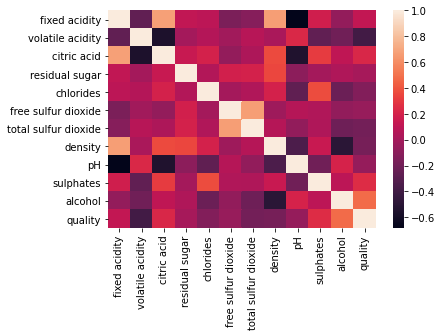

In [ ]:
sns.heatmap(Correlated_vars)

Seaborn Plot can easily help us to have easier visualization from most Correlated variables just With colors!
The DARKEST and the LIGHTEST blocks represets that there is a strong relationship between those attributes.
(if you dont know about this , read about different type of correlations between variables.its easy!)

#Do I Have to Fix Multicollinearity?
Multicollinearity makes it hard to interpret your coefficients, and it reduces the power of your model to identify independent variables that are statistically significant. These are definitely serious problems. However, the good news is that you don’t always have to find a way to fix multicollinearity!

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

1-The severity of the problems increases with the degree of the multicollinearity. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. Suppose your model contains the experimental variables of interest and some control variables. If high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems.

2-Multicollinearity affects only the specific independent variables that are correlated. Therefore, if multicollinearity is not present for the independent variables that you are particularly interested in, you may not need to resolve it. Suppose your model contains the experimental variables of interest and some control variables. If high multicollinearity exists for the control variables but not the experimental variables, then you can interpret the experimental variables without problems.

3-Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity. (Reference: "The fact that some or all predictor variables are correlated among themselves does not, in general, inhibit our ability to obtain a good fit nor does it tend to affect inferences about mean responses or predictions of new observations.